In [4]:
from IPython.display import Image

# <a href="https://programmers.co.kr/learn/courses/30/lessons/67256">문제 설명</a>

스마트폰 전화 키패드의 각 칸에 다음과 같은 숫자들이 적혀 있습니다.

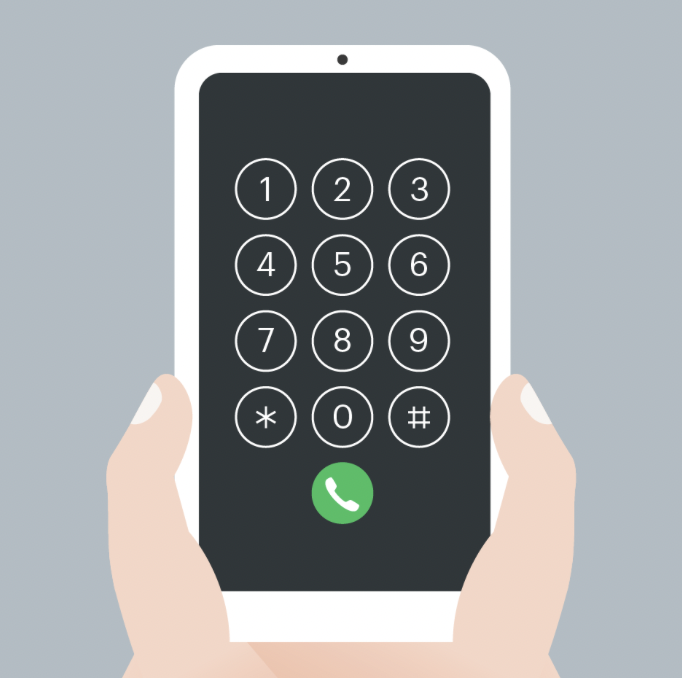

In [5]:
Image('./Images/키패드 누르기.png', width = 400, height = 300)

이 전화 키패드에서 왼손과 오른손의 엄지손가락만을 이용해서 숫자만을 입력하려고 합니다.

맨 처음 왼손 엄지손가락은 `*` 키패드에 오른손 엄지손가락은 `#` 키패드 위치에서 시작하며, 엄지손가락을 사용하는 규칙은 다음과 같습니다.

1. 엄지손가락은 상하좌우 4가지 방향으로만 이동할 수 있으며 키패드 이동 한 칸은 거리로 1에 해당합니다.

2. 왼쪽 열의 3개의 숫자 `1`, `4`, `7`을 입력할 때는 왼손 엄지손가락을 사용합니다.

3. 오른쪽 열의 3개의 숫자 `3`, `6`, `9`를 입력할 때는 오른손 엄지손가락을 사용합니다.

4. 가운데 열의 4개의 숫자 `2`, `5`, `8`, `0`을 입력할 때는 두 엄지손가락의 현재 키패드의 위치에서 더 가까운 엄지손가락을 사용합니다.

5. 만약 두 엄지손가락의 거리가 같다면, 오른손잡이는 오른손 엄지손가락, 왼손잡이는 왼손 엄지손가락을 사용합니다.

순서대로 누를 번호가 담긴 배열 numbers, 왼손잡이인지 오른손잡이인지를 나타내는 문자열 hand가 매개변수로 주어질 때, 각 번호를 누른 엄지손가락이 왼손인지 오른손인지를 나타내는 연손된 문자열 형태로 return 하도록 solution 함수를 완성해주세요.

**제한사항**

- numbers 배열의 크기는 1이상 1,000 이하입니다.

- numbers 배열 원소의 값은 0 이상 9 이하인 정수입니다.

- hand는 `left` 또는 `right` 입니다.

- 왼손 엄지손가락을 사용한 경우는 `L`, 오른손 엄지손가락을 사용한 경우는 `R`을 순서대로 이어붙여 문자열 형태로 return 해주세요.

**입출력 예시**

|numbers|hand|result|
|-----|-----|-----|
|[1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 2]|"right"|"LRLLLRLLRRL"|
|[7, 0, 8, 2, 8, 3, 1, 5, 7, 6, 2]|"left"|"LRLLRRLLLRR"|
|[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]|"right"|"LLRLLRLLRL"|

## My Solution - 실패

In [6]:
# 틀린 풀이 과정
def soultion(numbers, hand):
    
    # 왼쪽과 오른쪽 초기값 지정
    left_number = 0
    right_number = 0
    
    # 반환값 저장
    answer = ""
    
    for number in numbers:
        
        # '1, 4, 7'의 경우에는 자동으로 왼손
        if number in [1, 4, 7]:
            answer += "L"
            
            # 'left_number' 변수 갱신
            left_number = number
            
        # '3, 6, 9'의 경우에는 자동으로 오른손
        elif number in [3, 6, 9]:
            answer += "R"
            
            # 'right_number' 변수 갱신
            right_number = number
            
        # 그 외의 경우
        else:
            
            right_diff = abs(right_number - number)
            left_diff = abs(left_number - number)
            
            if right_diff < left_diff:
                answer += "R"
                right_number = number
            
            elif left_diff < right_diff:
                answer += "L"
                left_number = number
            
            else:
                # 오른손잡이인 경우
                if hand == "right":
                    answer += "R"
                    right_number = number
                    
                else:
                    answer += "L"
                    left_number = number
    
    return answer

- 위의 풀이과정은 완전히 틀린 함수이며, `1`, `4`, `7`과 `3`, `6`, `9`에서 2, 5, 8, 0을 누르는 경우만 생각하고 코드를 작성하였다.

- 만약 오른손잡이의 사람이 오른쪽 손의 위치가 `2`이고 왼쪽 손의 위치가 `4`인 경우라고 할 때, 눌러야 할 숫자는 `5`라고 가정해보도록 하자.

- 그러면 당연히 오른손으로 눌러야하지만, 위의 코드대로 실행하는 경우에는 왼손으로 누르게 된다.

- 즉, 모든 경우의 수를 반영하지 못한 풀이이다.

---

## Another Solution 1

- 자판으로 문제가 주어져있지만 `좌표`로 생각하고 문제를 풀면된다.

In [9]:
# 문제 함수 생성
def solution(numbers, hand):
    
    # 반환값 생성
    answer = ""
    
    # 키패드를 좌표로 변경하기 위해 dictionary 객체 생성
    coor_dic = {1 : [0, 0], 2 : [0, 1], 3 : [0, 2],
                4 : [1, 0], 5 : [1, 1], 6 : [1, 2],
                7 : [2, 0], 8 : [2, 1], 9 : [2, 2],
               "*" : [3, 0], 0 : [3, 1], "#" : [3, 2]}
    
    # 오른손과 왼손 시작 위치 지정
    left_coor = coor_dic["*"]
    right_coor = coor_dic["#"]
    
    for number in numbers:
        
        # 해당하는 숫자의 좌표를 저장
        loop_coor = coor_dic[number]
        
        # '1, 4, 7'의 경우에는 자동으로 왼손
        if number in [1, 4, 7]:
            answer += "L"
            
            left_coor = loop_coor
        
        # '3, 6, 9'의 경우에는 자동으로 오른손
        elif number in [3, 6, 9]:
            answer += "R"
            
            right_coor = loop_coor
            
        # 그 외의 경우
        else:
            
            # 거리를 계산하기 위해 오른손과 왼손 초기값을 0으로 지정해준다.
            left_diff = 0
            right_diff = 0
            
            # 좌표 거리 계산하기
            for left, right, loop in zip(left_coor, right_coor, loop_coor):
                left_diff += abs(left - loop)
                right_diff += abs(right - loop)
                
            # 왼손이 더 가까운 경우
            if left_diff < right_diff:
                answer += "L"
                
                left_coor = loop_coor
                
            # 오른손이 더 가까운 경우
            elif right_diff < left_diff:
                answer += "R"
                
                right_coor = loop_coor
                
            # 두 거리가 같은 경우에는 사람의 손잡이 여부에 따라 달라진다
            else:
                
                if hand == "right":
                    answer += "R"
                    right_coor = loop_coor
                
                else:
                    answer += "L"
                    left_coor = loop_coor
    
    return answer

In [10]:
# 첫 번째 테스트 수행
numbers = [1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 2]
hand = "right"

print(solution(numbers, hand))

LRLLLRLLRRL


In [11]:
# 두 번째 테스트 수행
numbers = [7, 0, 8, 2, 8, 3, 1, 5, 7, 6, 2]
hand = "left"

print(solution(numbers, hand))

LRLLRRLLLRR


In [12]:
# 세 번째 테스트 수행
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
hand = "right"

print(solution(numbers, hand))

LLRLLRLLRL


- 이 외의 다른 사람의 풀이 방법도 살펴보면, 대부분 좌표를 구성하여 해당 문제를 풀었다.

- 위와 같은 문제가 나올 때는 **좌표**를 생각하기!!